<a href="https://colab.research.google.com/github/bmontoyag/UTEC_MISTI_2026/blob/main/regresi_n_log_stica_y_fundamentos_perceptr_nipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Regresión Logística y Fundamentos de Perceptrón
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

5 pacientes:

ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | No | No | Sí | Enfermo
2 | Sí | No | No | Sano
3 | No | Sí | No | Sano
4 | Sí | Sí | Sí | Enfermo
5 | No | Sí | Sí | Enfermo




ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | 0 | 0 | 1 | 1
2 | 1 | 0 | 0 | 0
3 | 0 | 1 | 0 | 0
4 | 1 | 1 | 1 | 1
5 | 0 | 1 | 1 | 1

In [ ]:
d_ent = [
  {'X':[0,0,1], 'Y':1}, #ID1
  {'X':[1,0,0], 'Y':0}, #ID2
  {'X':[0,1,0], 'Y':0}, #ID3
  {'X':[1,1,1], 'Y':1}, #ID4
  {'X':[0,1,1], 'Y':1}, #ID2
]

3 features, entonces tenemos 3 pesos:

$$
W = \{w_0, w_1. w_2\}
$$


In [ ]:
import math
import random

In [ ]:
u = random.uniform(-1,1)
print(u)

0.351002087540788


In [ ]:
print(random.uniform(-1,1))
print(random.uniform(-1,1))
print(random.uniform(-1,1))

-0.7142306293882765
0.8314598568892466
-0.33833643059248386


## Pesos
$$
\sum_{i=0}^{d-1} w_i\times x_i
$$

## Función Simgoidal

$$
\phi(z) = \frac{1}{1+e^{-z}}
$$



In [ ]:
def sigmoide(Z):
  a = []
  for z in Z:
    phi = (1/(1+math.exp(-z)))
    a.append(phi)
  return a

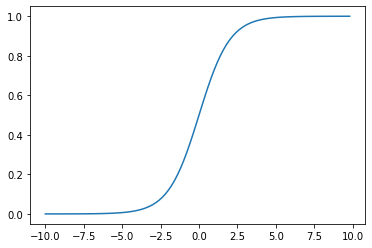

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10.,10., 0.2)
s = sigmoide(z)
plt.plot(z,s)

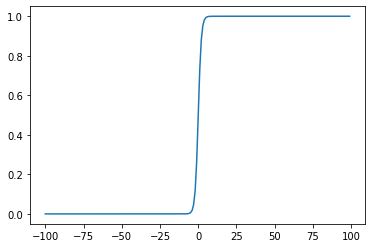

In [ ]:
z = np.arange(-100.,100., 1.)
s = sigmoide(z)
plt.plot(z,s)

$$
sumatoria = \sum_{i=0}^{d-1} w_i\times x_i
$$

$$
\phi(\sum_{i=0}^{d-1} w_i\times x_i) = \frac{1}{1+e^{-\sum_{i=0}^{d-1} w_i\times x_i}}
$$

## Gradiente

$$
Gradiente = y_{proba}\times (1-y_{proba})
$$

In [ ]:
def gradiente(y_proba):
  return y_proba*(1-y_proba)


print("Proba\tGradiente")
prob = 0.0
while prob <= 1.0:
  g = gradiente(prob)
  print("{:.2f}\t{:.2f}".format(prob, g))
  prob += 0.1

Proba	Gradiente
0.00	0.00
0.10	0.09
0.20	0.16
0.30	0.21
0.40	0.24
0.50	0.25
0.60	0.24
0.70	0.21
0.80	0.16
0.90	0.09
1.00	0.00


In [ ]:
class RegLog():
  def __init__(self):
    self.W = [random.uniform(-1,1), random.uniform(-1,1), random.uniform(-1,1)]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma

  def __sigmoide(self, suma):
    return 1/(1+math.exp(-suma))

  def predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma) + self.bias
    return y_prob

  def fit(self, d_ent, epocas):
    for _ in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        Y = ejemplo['Y']
        y_proba = self.predict(X)
        error = Y - y_proba
        n = self.__gradiente(y_proba)
        for i in range(len(self.W)):
          self.W[i] = self.W[i] + n*error*X[i]
        self.bias = self.bias + error*n
  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

In [ ]:
logit = RegLog()
print("Pesos: "+str(logit.W))

Pesos: [-0.8745351808441548, 0.40906075235388917, 0.35475183378798136]


In [ ]:
logit.fit(d_ent, 1)

In [ ]:
print("Pesos: "+str(logit.W))

Pesos: [-0.8230024365619305, 0.45986179662597626, 0.6485308066772876]


Dataset entrenamiento:

ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | No | No | Sí | Enfermo
2 | Sí | No | No | Sano
3 | No | Sí | No | Sano
4 | Sí | Sí | Sí | Enfermo
5 | No | Sí | Sí | Enfermo

Dataset de test:

ID | Mareos | Dolor muscular | Fiebre | Estado
--- | --- | --- | --- | ---
1 | Sí | No | Sí | Enfermo
2 | No | No | No | Sano


In [ ]:
d_test = [
          {'X':[1,0,1], 'Y':1},
          {'X':[0,0,0], 'Y':0},
]

In [ ]:
print("y_proba\ty_pred\ty_real")
for test in d_test:
  X = test['X']
  Y = test['Y']
  y_proba = logit.predict(X)
  print("{:.2f}\t{:.0f}\t{}".format(y_proba, y_proba, Y))

y_proba	y_pred	y_real
0.83	1	1
0.50	0	0


y_{proba} = 0.5 ¿es **sano** ó **enfermo**?

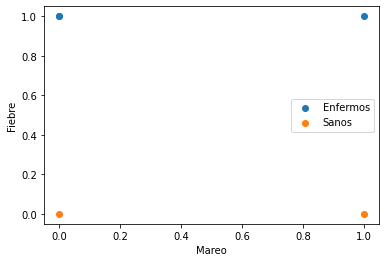

In [ ]:
d_ent = [
  {'X':[0,1], 'Y':1}, #ID1
  {'X':[1,0], 'Y':0}, #ID2
  {'X':[0,0], 'Y':0}, #ID3
  {'X':[1,1], 'Y':1}, #ID4
  {'X':[0,1], 'Y':1}, #ID2
]

plt.scatter([0,1,0],[1,1,1], label='Enfermos')
plt.scatter([1,0],[0,0], label='Sanos')
plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.legend()

$$
w_0 x_0 + w_1 x_1 + \theta = 0
$$

Pendiente: $\frac{-w_0}{w_1}$

Intercepto: $\frac{-\theta}{w_1}$

In [ ]:
class RegLog():
  def __init__(self):
    #self.W = [random.uniform(-1,1), random.uniform(-1,1)]
    self.W = [0.004, 0.004]
    self.bias = random.uniform(-1,1)

  def __sumatoria(self, X):
    suma = 0
    for i, x in enumerate(X):
      suma += self.W[i]*x
    return suma

  def __sigmoide(self, suma):
    return 1/(1+math.exp(-suma))

  def predict(self, X):
    suma = self.__sumatoria(X)
    y_prob = self.__sigmoide(suma) + self.bias
    return y_prob

  def fit(self, d_ent, epocas):
    for _ in range(epocas):
      for ejemplo in d_ent:
        X = ejemplo['X']
        Y = ejemplo['Y']
        y_proba = self.predict(X)
        error = Y - y_proba
        n = self.__gradiente(y_proba)
        for i in range(len(self.W)):
          self.W[i] = self.W[i] + n*error*X[i]
        self.bias = self.bias + error*n
  def __gradiente(self, y_proba):
    return y_proba*(1-y_proba)

In [ ]:
logit = RegLog()
print("Pesos antiguos: ", logit.W)
W_antiguo = logit.W.copy()
bias_antiguo = logit.bias

logit.fit(d_ent, 1)
print("Nuevos pesos: ", logit.W)

Pesos antiguos:  [0.004, 0.004]
Nuevos pesos:  [0.07862527356021445, 0.28411935773360186]


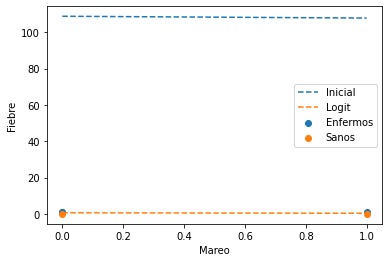

In [ ]:
plt.scatter([0,1,0],[1,1,1], label='Enfermos')
plt.scatter([1,0],[0,0], label='Sanos')
plt.xlabel("Mareo")
plt.ylabel("Fiebre")
plt.legend()


m, b = -1*(W_antiguo[0]/W_antiguo[1]), -1*(bias_antiguo/W_antiguo[1])
x = np.linspace(0,1,10)
logit_inicial = plt.plot(x, x*m+b, '--', label='Inicial')


m, b = -1*(logit.W[0]/logit.W[1]), -1*(logit.bias/logit.W[1])
x = np.linspace(0,1,10)
logit_inicial = plt.plot(x, x*m+b, '--', label='Logit')


plt.legend()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X,y)
clf.predict(X[:2,:])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0])

# Tarea

- Usar el dataset real UVI
- Considerar el pre-procesamiento que consideren apropiados para testear hipótesis que minimicen la tasa de error
- En conclusiones referenciar los resultados de manera cuantitativa resaltando los principales hallazgos  